In [3]:
import dill
dill.load_session("notebook_env.db")

Best accuracy: 0.96
Best k: 29.00


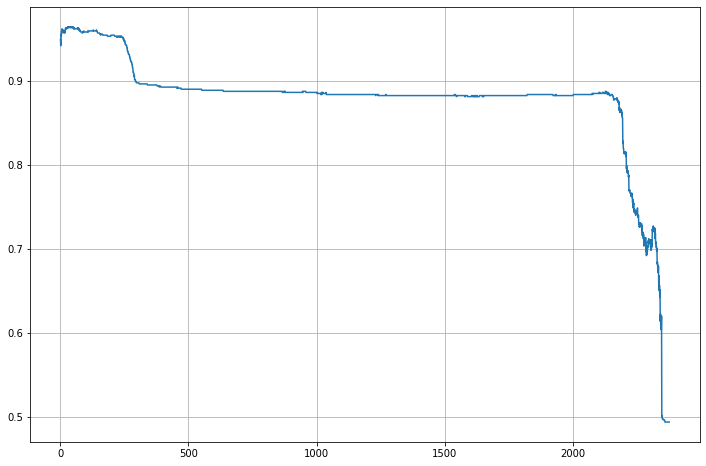

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
test_accuracies = []
k_values = range(1,len(data_train)) 
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(data_train[["meanfun","IQR"]], data_train.label)
    test_accuracies.append(knn.score(data_test[["meanfun","IQR"]], data_test.label))

best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Best accuracy: %0.2f" % best_accuracy)
print("Best k: %0.2f" % best_k)
    
plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

In [5]:
def plot2d(data, label_suffix='', marker='o'):
    classes=sorted(data['label'].unique())
    for c in classes:
        plt.plot(data.where(data['label']==c).dropna().meanfun.values,
                 data.where(data['label']==c).dropna().IQR.values,'o', label=c+label_suffix, marker=marker, markersize=10)

    plt.axis('equal')



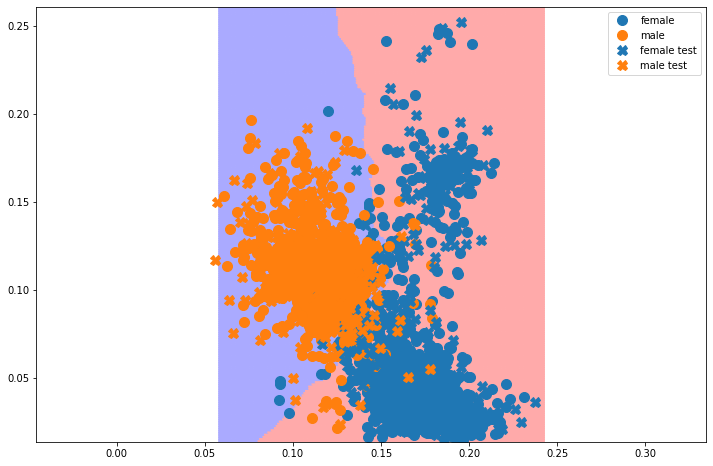

In [10]:
import numpy as np
from matplotlib.colors import ListedColormap
#creiamo una colormap per mostrare le regioni di decisione
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
import matplotlib.patches as mpatches
knn=KNN(n_neighbors=best_k)
knn.fit(data_train[["meanfun","IQR"]], data_train.label)
def plot_knn_decision_boundary(data, knn):
    plot2d(data)
    X = np.linspace(data['meanfun'].min()*0.95, data['meanfun'].max()*1.05,200)
    Y = np.linspace(data['IQR'].min()*0.95, data['IQR'].max()*1.05,200)
    X,Y = np.meshgrid(X,Y)
    
    Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
    
    class_dict = {c:i for i,c in enumerate(knn.classes_)}
    
    Z=list(map(lambda x: class_dict[x],Z))
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap=cmap_light)
    #plt.contour(X,Y,Z)
data_test_fixed=data_test.copy()
data_test_fixed["label"]=data_test_fixed["label"].replace({0:"male",1:"female"})
data_train_fixed=data_train.copy()
data_train_fixed["label"]=data_train_fixed["label"].replace({0:"male",1:"female"})
plt.figure(figsize=(12,8))
plot_knn_decision_boundary(data_train_fixed,knn)

plt.gca().set_prop_cycle(None)
plot2d(data_test_fixed,label_suffix=' test', marker='X')
plt.legend()

plt.show()

In [13]:
pred=knn.predict(data_test[["meanfun","IQR"]])
print("Classification report:\n",classification_report(data_test.label,pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       391
           1       0.97      0.96      0.96       401

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



<h1>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Best accuracy: 0.69
Best k: 5.00


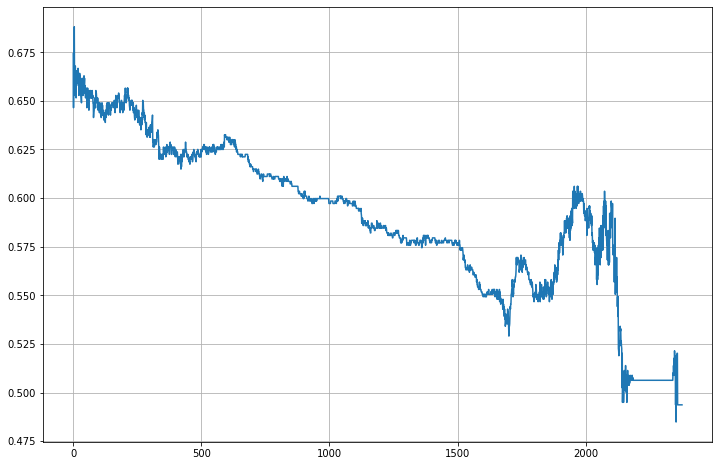

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
test_accuracies1 = []
k_values1 = range(1,len(data_train)) 
for k in k_values:
    knn1 = KNN(n_neighbors=k)
    knn1.fit(data_train.drop(columns="label"), data_train.label)
    test_accuracies1.append(knn1.score(data_test.drop(columns="label"), data_test.label))

best_index1 = np.argmax(test_accuracies1)
best_k1 = k_values1[best_index1]
best_accuracy1 = test_accuracies1[best_index1]
print("Best accuracy: %0.2f" % best_accuracy1)
print("Best k: %0.2f" % best_k1)
    
plt.figure(figsize=(12,8))
plt.plot(k_values1,test_accuracies1)
plt.grid()
plt.show()

In [15]:
knn1=KNN(n_neighbors=best_k1)
knn1.fit(data_train.drop(columns="label"), data_train.label)
pred=knn1.predict(data_test.drop(columns="label"))
print("Classification report:\n",classification_report(data_test.label,pred))

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       391
           1       0.70      0.68      0.69       401

    accuracy                           0.69       792
   macro avg       0.69      0.69      0.69       792
weighted avg       0.69      0.69      0.69       792



In [16]:
dill.dump_session("notebook_env.db")